In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
from scipy import stats
def linr(a,b):
    slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)
    return slope

In [3]:
nino = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\nino3.4.nc')
nino34 = nino.sst.loc['1981-02-01':'2021-11-01']
nino34 = nino34.resample(time ="M").mean(dim="time")
#chazhi_nino34 = nino34.value
nino34.time

<xarray.DataArray 'time' (time: 490)>
array(['1981-02-28T00:00:00.000000000', '1981-03-31T00:00:00.000000000',
       '1981-04-30T00:00:00.000000000', ..., '2021-09-30T00:00:00.000000000',
       '2021-10-31T00:00:00.000000000', '2021-11-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-02-28 1981-03-31 ... 2021-11-30

In [4]:
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\Monday\correction.nc')
ds = f.__xarray_dataarray_variable__
nds = ds.loc[:,5:-5.1,120:180]
varnds = nds.rolling(time = 91, center = True).var().dropna("time")

a = varnds.values
b = np.sqrt(a)
lat = varnds['lat']
lon = varnds['lon']
time = varnds['time']

sqrtvar = xr.DataArray(b,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])
print(sqrtvar)
sqrtvar = sqrtvar.resample(time ="M").mean(dim="time")
sqrtvar.time

<xarray.DataArray (time: 14885, lat: 5, lon: 25)>
array([[[12.77630525, 12.54776509, 12.48284257, ...,  5.40208521,
          7.12424267,  8.12299464],
        [12.8694912 , 13.89309688, 13.5535722 , ...,  4.55182511,
          7.87863365,  5.99308984],
        [10.36779616, 10.06426285, 10.35257621, ...,  8.19902699,
          6.67390755,  6.51343211],
        [ 8.9568628 ,  7.41192758,  8.95022027, ..., 14.9104364 ,
         14.46110861, 13.18936218],
        [ 9.57653466,  8.5064872 ,  8.7071696 , ..., 25.26009994,
         22.8230367 , 21.95290575]],

       [[12.73306276, 12.45275727, 12.47141201, ...,  5.38109393,
          7.12321423,  8.08943163],
        [12.881313  , 14.06360613, 13.78010343, ...,  4.55524485,
          7.93320418,  5.97595209],
        [10.60110825, 10.23875753, 10.54710537, ...,  8.18012963,
          6.63116057,  6.4616165 ],
        [ 9.27089356,  7.5783016 ,  9.12836271, ..., 14.90737775,
         14.48235795, 13.22058811],
        [ 9.72104484,  8.69188

<xarray.DataArray 'time' (time: 490)>
array(['1981-02-28T00:00:00.000000000', '1981-03-31T00:00:00.000000000',
       '1981-04-30T00:00:00.000000000', ..., '2021-09-30T00:00:00.000000000',
       '2021-10-31T00:00:00.000000000', '2021-11-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-02-28 1981-03-31 ... 2021-11-30

In [5]:
res = linr(sqrtvar.mean(axis=(1,2)),nino34)
print(res)

0.12598274110912333


In [6]:
result = np.apply_along_axis(lambda sqrtvar: linr(sqrtvar, nino34), axis=0, arr=sqrtvar)

reg =  xr.DataArray(result, coords= [sqrtvar.lat,sqrtvar.lon]) #converts the output to an xarray DataArray

In [7]:
print(reg.max())

<xarray.DataArray ()>
array(0.13932425)


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\mpl\style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


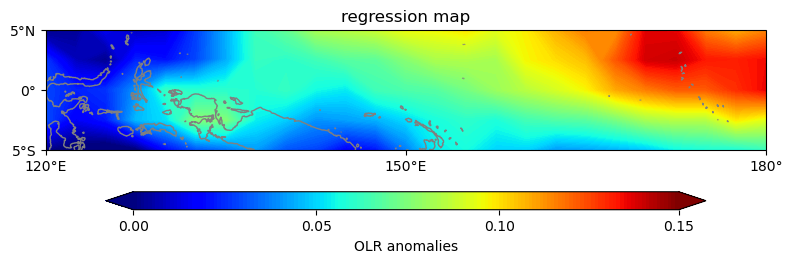

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (120,180,-5,5)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(12,6))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(120,181,30), crs=ccrs.PlateCarree())
ax.set_yticks(range(-5,6,5), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('regression map')

c = ax.contourf(sqrtvar.lon,sqrtvar.lat,reg,
                levels=np.arange(0,0.15,0.001),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(0,0.151,0.05),
             shrink=0.7)

In [9]:
nds = ds.loc[:,20:-20.1,:]
varnds = nds.rolling(time = 91, center = True).var().dropna("time")

a = varnds.values
b = np.sqrt(a)
lat = varnds['lat']
lon = varnds['lon']
time = varnds['time']

sqrtvar = xr.DataArray(b,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])
print(sqrtvar)
sqrtvar = sqrtvar.resample(time ="M").mean(dim="time")

<xarray.DataArray (time: 14885, lat: 17, lon: 144)>
array([[[ 5.13239133,  6.50845248,  6.5646651 , ...,  7.48393422,
          7.55047107,  6.00141758],
        [ 5.48993232,  5.19183111,  5.48713741, ...,  9.52616488,
          7.84166233,  7.52768778],
        [ 7.27152257,  5.98341641,  5.43564677, ...,  7.74615485,
          7.45730838,  7.4516713 ],
        ...,
        [ 3.45854724,  3.42479335,  3.20809234, ...,  2.71905353,
          2.52747691,  1.74370501],
        [ 2.14075254,  2.22595016,  2.4603543 , ...,  2.56747772,
          2.17395627,  2.38546558],
        [ 2.25821836,  2.37048805,  2.37661506, ...,  2.85352873,
          2.87159038,  1.62119555]],

       [[ 5.4404597 ,  6.68535318,  6.6270164 , ...,  7.81260311,
          7.87484377,  6.31768201],
        [ 5.53894649,  5.27958737,  5.54465287, ...,  9.69682369,
          8.02507691,  7.57793377],
        [ 7.36834318,  6.15159588,  5.69376837, ...,  7.88876332,
          7.49499566,  7.44296127],
...
        [ 3

In [10]:
result = np.apply_along_axis(lambda sqrtvar: linr(sqrtvar, nino34), axis=0, arr=sqrtvar)

reg =  xr.DataArray(result, coords= [sqrtvar.lat,sqrtvar.lon]) 
reg.min()

<xarray.DataArray ()>
array(-0.10400716)

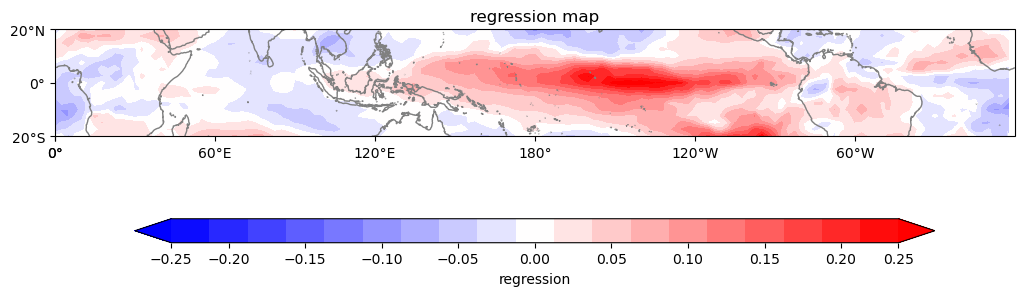

In [23]:
leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('regression map')

c = ax.contourf(sqrtvar.lon,sqrtvar.lat,reg,
                levels=np.arange(-0.2375,0.251,0.025),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'regression', 
             ticks=np.arange(-0.25,0.251,0.05),
             shrink=0.7)